In [106]:
import pandas as pd
import seaborn as sns              # gráficos
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt   # gráficos

In [135]:
 #read a csv file
df_fd = pd.read_csv(r'full_data.csv') # en caso de que se use de manera local
 #df=pd.read_csv("C:/Users/inu/Documents/ia/trabajo practico 1/dataset/weather.csv")
sns.set_style('darkgrid')
df_fd.head(100)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
95,Male,71.0,1,1,No,Govt_job,Rural,216.94,30.9,never smoked,1
96,Male,61.0,1,0,Yes,Self-employed,Rural,76.11,27.3,smokes,1
97,Male,74.0,0,0,Yes,Private,Urban,72.96,31.3,smokes,1
98,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1


In [116]:

df_copy = df_fd.copy()

# reemplaza las columnas smoking status, residence type, work type por variables dummys binarias

df_copy = pd.get_dummies(df_fd, columns=['smoking_status', 'Residence_type', 'work_type'])


# de la columna "ever_married" se reemplazan los valores "Yes" por 1 y "No" por 0
df_copy['ever_married'] = df_copy['ever_married'].replace(['Yes'], 1)
df_copy['ever_married'] = df_copy['ever_married'].replace(['No'], 0)

# de la columna "gender" del dataframe df_fd, reemplaza Male por 1 y Female por 0
df_copy['gender'] = df_copy['gender'].replace(['Male'], 1)
df_copy['gender'] = df_copy['gender'].replace(['Female'], 0)



df_copy.head()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,0,1,0,1,0,0,1,0,0
2,0,49.0,0,0,1,171.23,34.4,1,0,0,0,1,0,1,0,1,0,0
3,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0


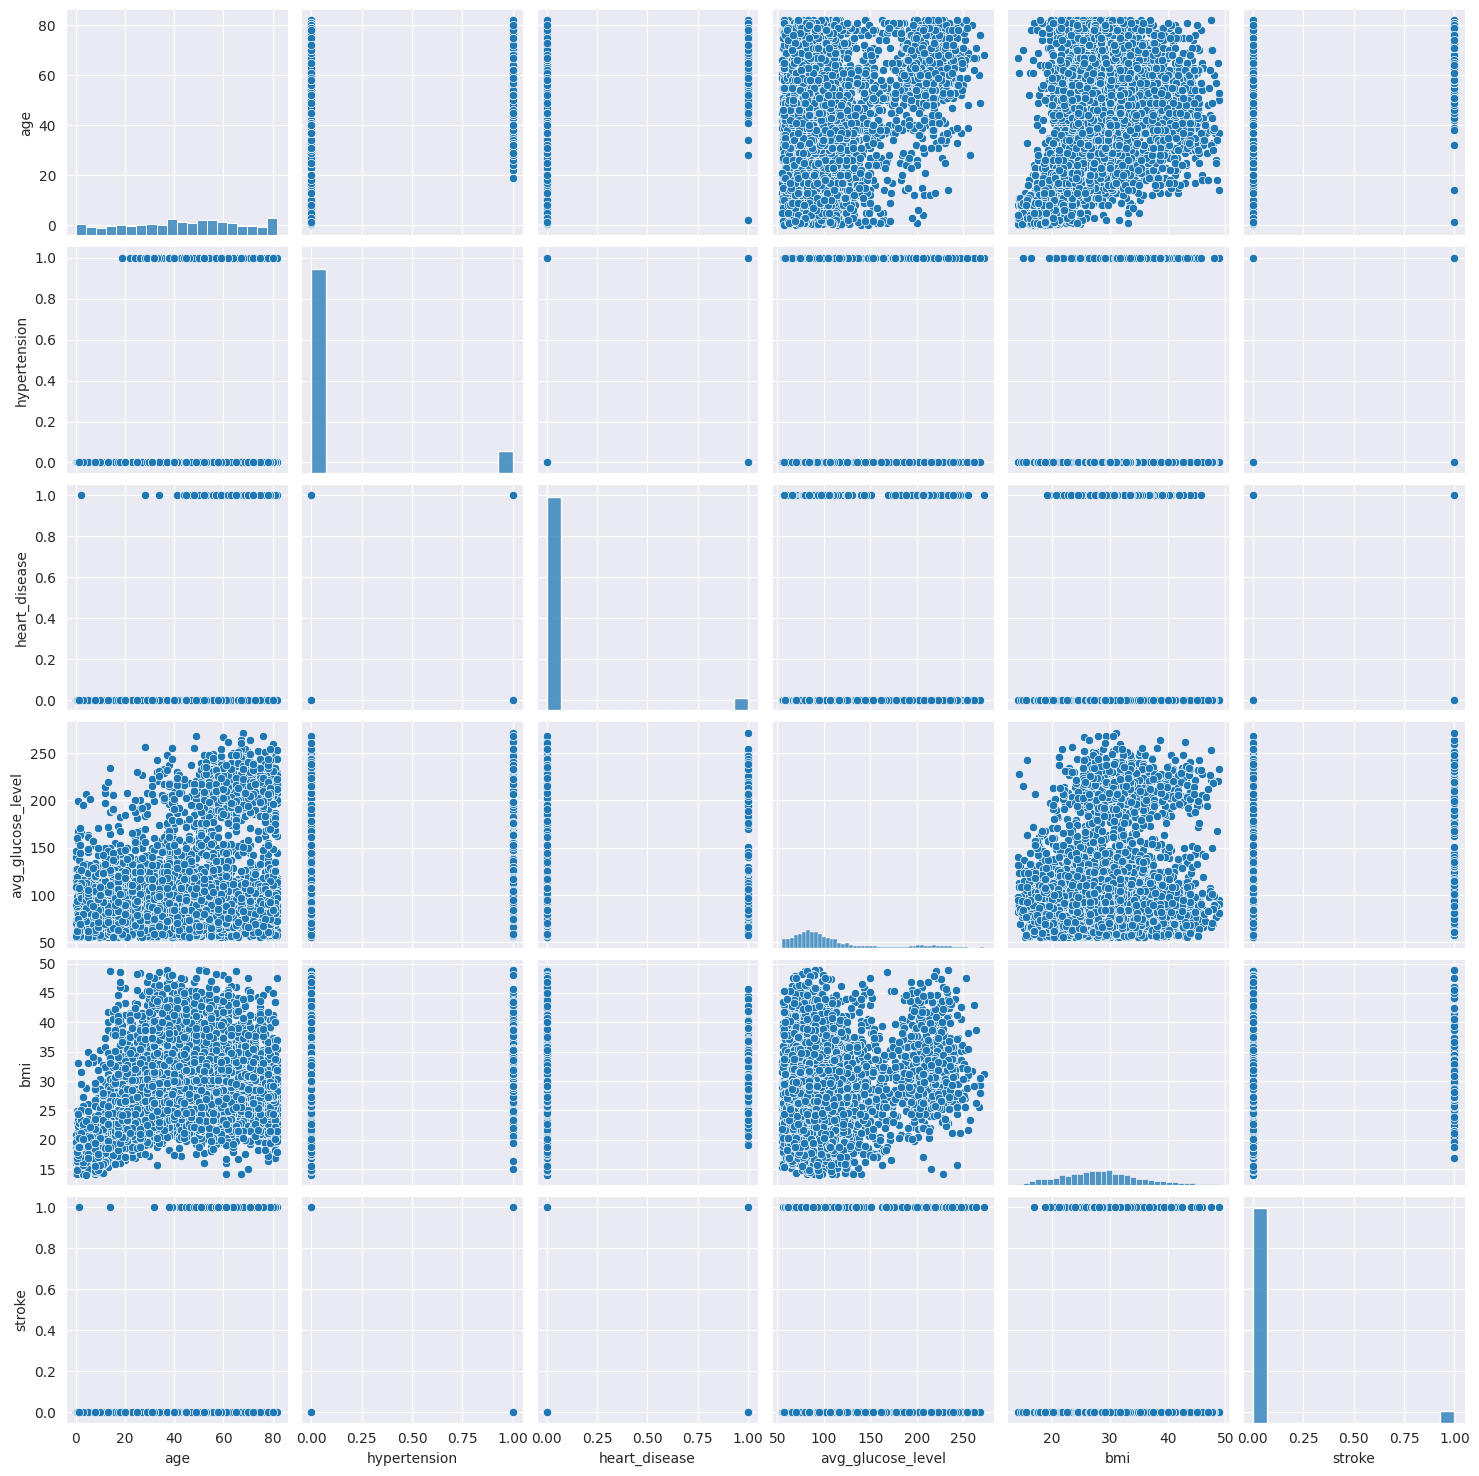

In [109]:

sns.pairplot(df_fd, palette = "Spectral")
plt.show()

### Regresion lineal multiple

In [147]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

X_multiple = df_copy[['age', 'bmi', 'hypertension', 'heart_disease', 'avg_glucose_level', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Residence_type_Rural', 'Residence_type_Urban', 'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']]
  
Y_multiple = df_copy['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(X_multiple,Y_multiple,test_size=0.2,random_state=42)
regresion_multiple = linear_model.LinearRegression()
regresion_multiple.fit(X_train,Y_train)

coef_regresion = regresion_multiple.coef_
intecept_y = regresion_multiple.intercept_

print("Las pendiente de las rectas son",coef_regresion, " y la interseccion es ",intecept_y )

predict = regresion_multiple.predict(X_test)
mean_squared_error(Y_test, predict)
score = regresion_multiple.score(X_test, Y_test)

print("El score es de", (score))

Las pendiente de las rectas son [ 0.0022043  -0.00156575  0.04882543  0.04056739 -0.00835969 -0.00749334]  y la interseccion es  -0.0038522521017089195
El score es de 0.08232139542386774
